In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [7]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

1081

In [10]:
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


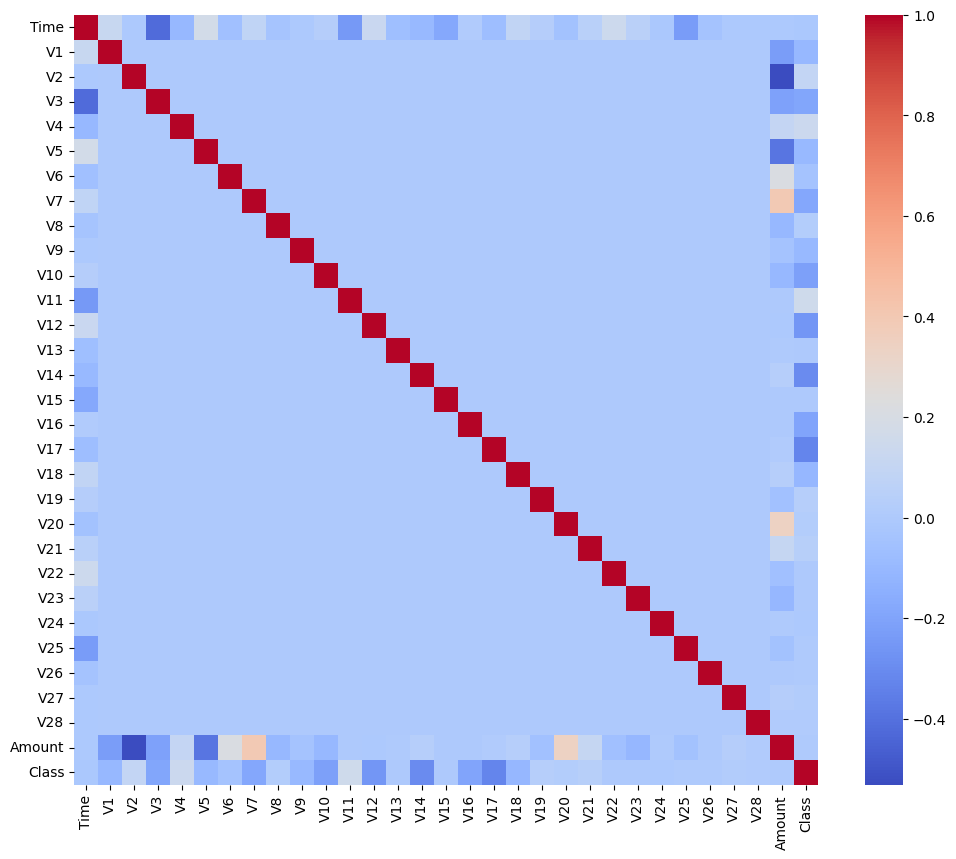

In [11]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.show()

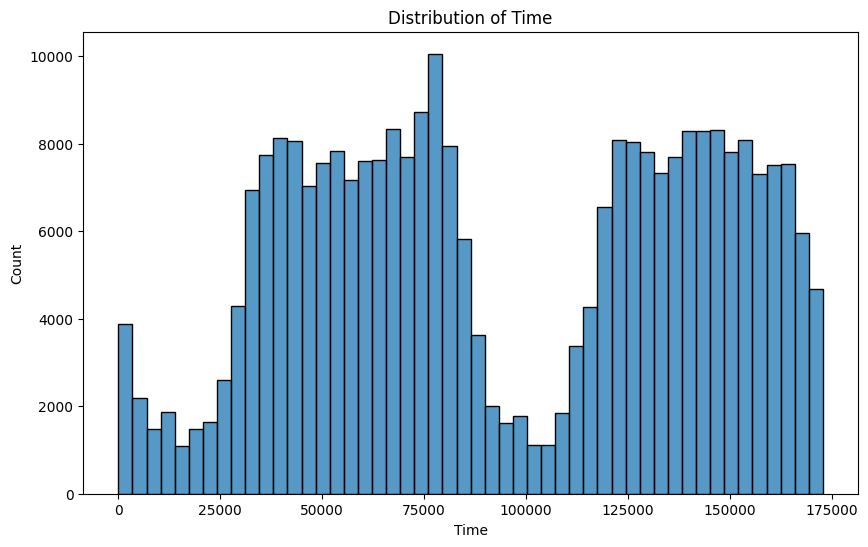

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Time'], bins=50)
plt.title('Distribution of Time')
plt.show()


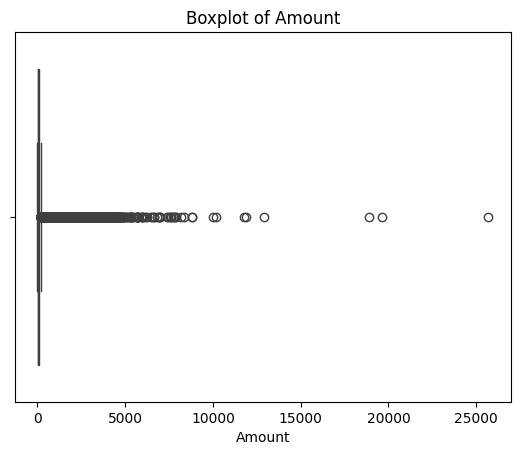

In [13]:
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Amount')
plt.show()


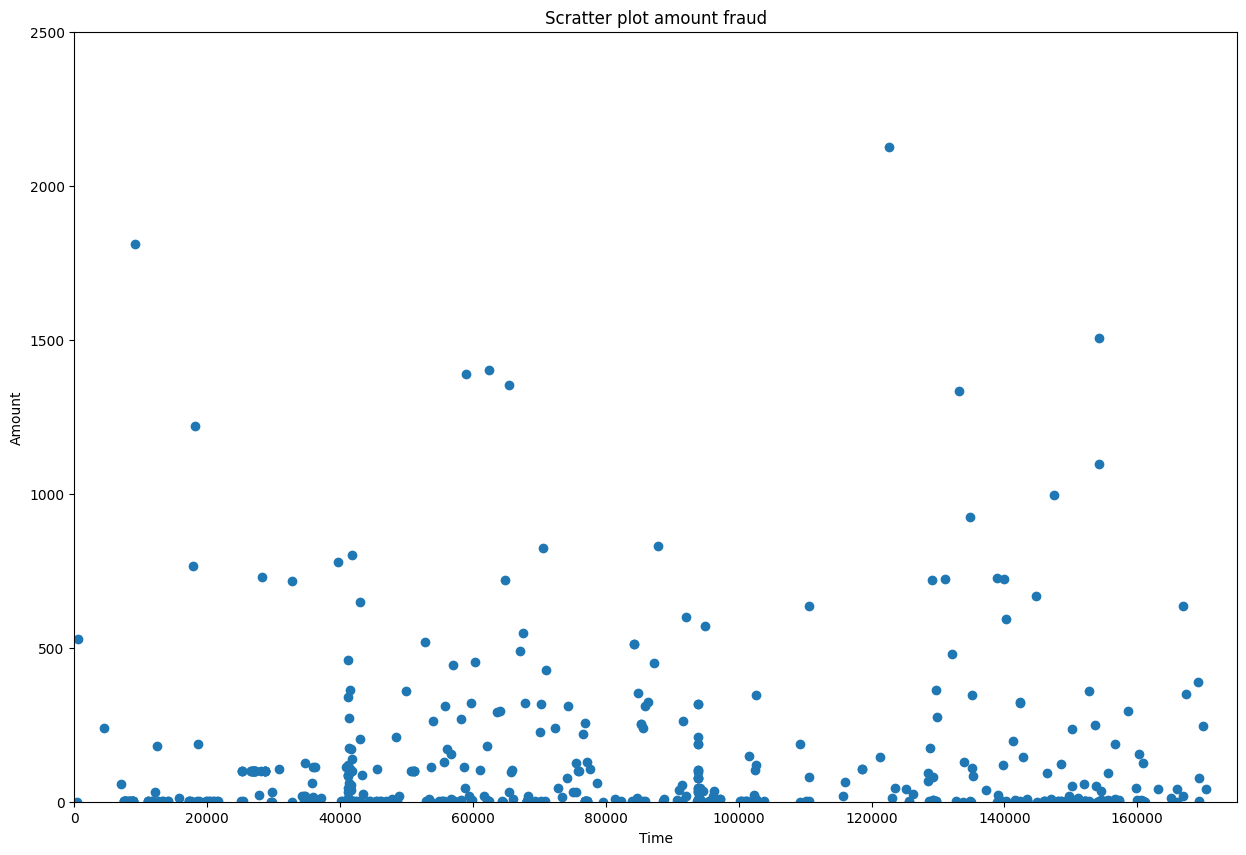

In [14]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [15]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


In [16]:
df_corr = df.corr()
rank = df_corr['Class'] # Retrieving the correlation coefficients per feature in relation to the feature class
df_rank = pd.DataFrame(rank)
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Ranking the absolute values of the coefficients
                                                                  # in descending order
df_rank.dropna(inplace=True) # Removing Missing Data (not a number)

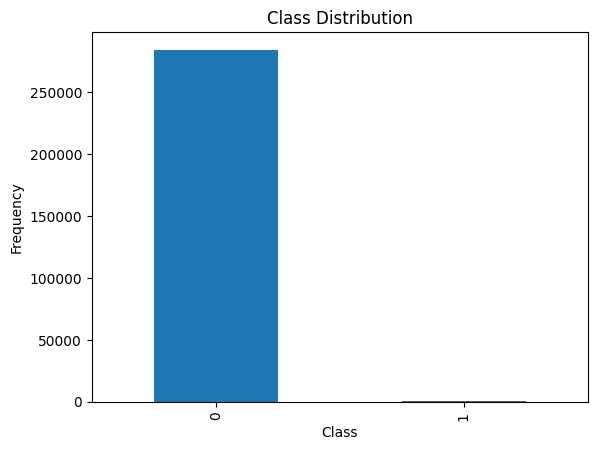

In [17]:
df['Class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [18]:
features = df.drop(columns=['Class'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled['Class'] = df['Class'].values


In [19]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [20]:
X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Get counts of each class in the training set
class_counts = y_train.value_counts()

# Determine the majority class and its count
majority_class = class_counts.index[0]
majority_class_count = class_counts[majority_class]
print('the majority class is :' ,majority_class,'and its count is :',majority_class_count)

the majority class is : 0 and its count is : 227451


In [22]:
desired_majority_count = int(majority_class_count / 2)
desired_majority_count

113725

In [23]:
# Define the resampling strategy
oversample = SMOTE()
undersample = RandomUnderSampler()
pipeline = Pipeline(steps=[('o', oversample), ('u', undersample)])

In [24]:
X_res, y_res = pipeline.fit_resample(X_train, y_train)

In [25]:
print(f'Resampled class distribution: {Counter(y_res)}')

Resampled class distribution: Counter({0: 227451, 1: 227451})


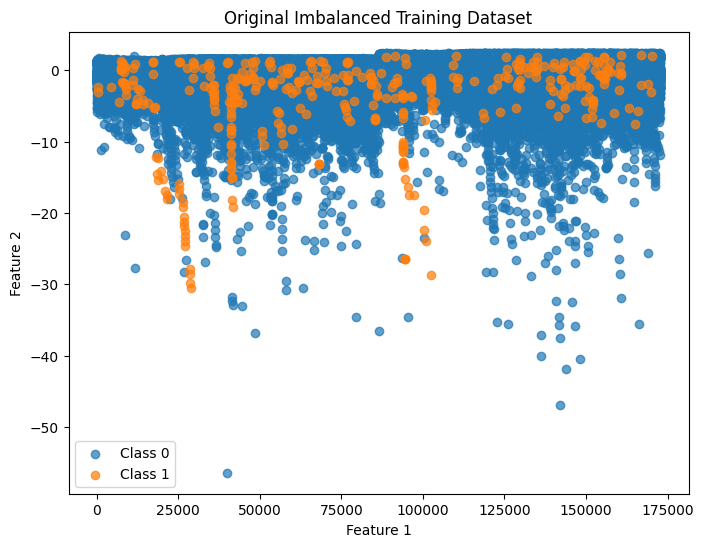

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0].iloc[:, 0], X_train[y_train == 0].iloc[:, 1], label='Class 0', alpha=0.7)
plt.scatter(X_train[y_train == 1].iloc[:, 0], X_train[y_train == 1].iloc[:, 1], label='Class 1', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Imbalanced Training Dataset')
plt.legend()
plt.show()

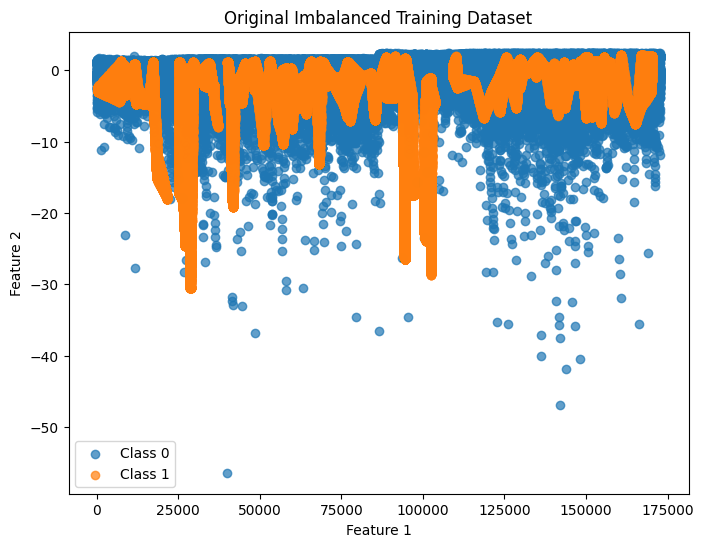

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(X_res[y_res == 0].iloc[:, 0], X_res[y_res == 0].iloc[:, 1], label='Class 0', alpha=0.7)
plt.scatter(X_res[y_res == 1].iloc[:, 0], X_res[y_res == 1].iloc[:, 1], label='Class 1', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Imbalanced Training Dataset')
plt.legend()
plt.show()

In [28]:
# Compare value counts before undersampling
print("Value counts before resampling:")
print(y_train.value_counts())

# Compare value counts after undersampling
print("Value counts after resampling:")
print(y_res.value_counts())

Value counts before resampling:
Class
0    227451
1       394
Name: count, dtype: int64
Value counts after resampling:
Class
0    227451
1    227451
Name: count, dtype: int64


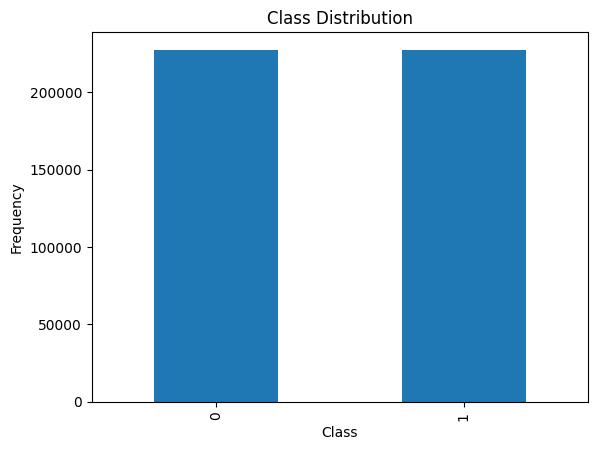

In [29]:
y_res.value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


In [30]:
X_res.shape

(454902, 30)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)

model.fit(X_res, y_res)

y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.89      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
[[55932   932]
 [   11    87]]


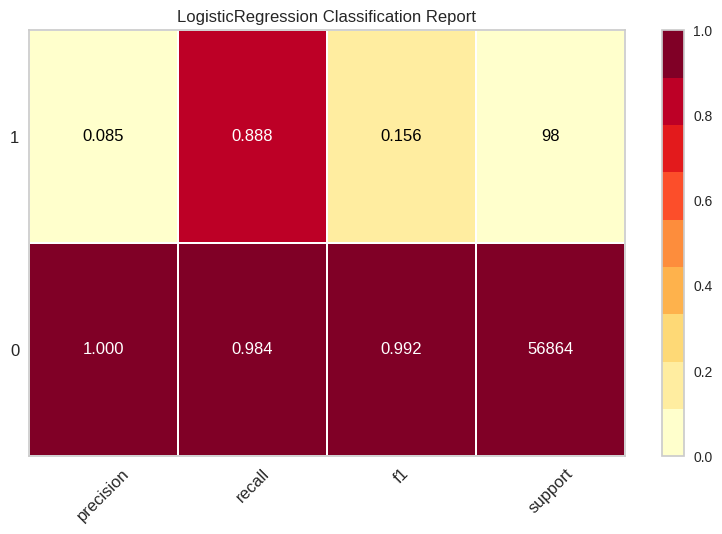

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [32]:
from yellowbrick.classifier import ClassificationReport
import warnings
warnings.filterwarnings("ignore")
visualizer = ClassificationReport(model, support=True)

visualizer.fit(X_res, y_res)


visualizer.score(X_test, y_test)

visualizer.show()

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf_model = Sequential([
    tf.keras.Input(shape=(X_res.shape[1],)),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

tf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

tf_model.fit(X_res, y_res, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = tf_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


Epoch 1/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.7340 - loss: 27.7387 - val_accuracy: 0.9847 - val_loss: 0.5475
Epoch 2/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.9259 - loss: 3.7740 - val_accuracy: 0.9770 - val_loss: 0.1937
Epoch 3/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.9501 - loss: 0.5199 - val_accuracy: 0.9931 - val_loss: 0.1202
Epoch 4/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.9504 - loss: 0.1536 - val_accuracy: 0.9930 - val_loss: 0.0594
Epoch 5/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9610 - loss: 0.1198 - val_accuracy: 0.9915 - val_loss: 0.0578
Epoch 6/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.9638 - loss: 0.1132 - val_accuracy: 0.9860 - val_loss: 0.0806
Epoch 7/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9662 - loss: 0.1053 - val_accuracy: 0.9862 - val_loss: 0.0770
Epoch 8/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: